In [1]:
import pandas as pd

In [2]:

# Read the CSV file into a pandas DataFrame
file_path = 'Crimes.csv'
crimes = pd.read_csv(file_path)


FileNotFoundError: [Errno 2] No such file or directory: 'Crimes.csv'

In [ ]:

#THIS ONE TAKES A WHILE SO SKIP IT
# Convert 'Date' column to datetime format
crimes['Date'] = pd.to_datetime(crimes['Date'])

# Filter the dataset for dates between January 1, 2010, and February 24, 2024
filtered_data = crimes[(crimes['Date'] >= '2010-01-01') & (crimes['Date'] <= '2024-02-25')]
# filtered_data


only data  between January 1, 2010, and February 24, 2024

In [ ]:
crimes=filtered_data
# crimes

In [ ]:
codes=['26', '07', '17', '01A', '18', '11', '08B', '04B', '08A', '24', '04A', '03', '14', '06', '05', '15', '02', '13', '20', '10', '09', '01B', '22', '16', '19', '12', '27'
]
codes=sorted(codes)
print(codes)

['01A', '01B', '02', '03', '04A', '04B', '05', '06', '07', '08A', '08B', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '22', '24', '26', '27']


In [ ]:
non_violent_codes=[ '01B',  '05', '06', '07','09', '10', '11', '12', '13', '14', '15', '16',  '18', '19', '22', '24', '26','27']

Violent FBI Codes

In [ ]:
violent_codes = [code for code in codes if code not in non_violent_codes]
violent_codes

['01A', '02', '03', '04A', '04B', '08A', '08B', '17', '20']

In [ ]:
violent_crimes = crimes[crimes['FBI Code'].isin(violent_codes)]
# violent_crimes['FBI Code'].unique()


In [ ]:
# Convert 'Date' column to datetime
violent_crimes['Date'] = pd.to_datetime(violent_crimes['Date'])

# Extract only the date part
violent_crimes['Date'] = violent_crimes['Date'].dt.date
# violent_crimes

C:\Users\BYU Rental\AppData\Local\Temp\ipykernel_19260\681520995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violent_crimes['Date'] = pd.to_datetime(violent_crimes['Date'])
C:\Users\BYU Rental\AppData\Local\Temp\ipykernel_19260\681520995.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violent_crimes['Date'] = violent_crimes['Date'].dt.date


In [ ]:
counts_by_date = violent_crimes.groupby('Date').size().reset_index(name='Count')
# counts_by_date


In [ ]:
# Generate date range
dates = pd.date_range(start='01/01/2010', end='02/24/2024', freq='D')

# Create dataframe
date_range = pd.DataFrame({'Date': dates})

# Convert 'Date' column to datetime
date_range['Date'] = pd.to_datetime(date_range['Date'])

# Extract only the date part
date_range['Date'] = date_range['Date'].dt.date



# date_range


In [ ]:
merged_df = pd.merge(date_range, counts_by_date, on='Date', how='left')
merged_df
crime_counts=merged_df
# crime_counts

In [ ]:

# Read the CSV file into a pandas DataFrame
file_path = 'weather.csv'
weather = pd.read_csv(file_path)
# Assuming your dataframe is called 'weather'
weather['datetime'] = pd.to_datetime(weather['datetime'])

# If you want to extract just the date part:
weather['datetime'] = weather['datetime'].dt.date
weather.rename(columns={'datetime': 'Date'}, inplace=True)
# Convert string dates to datetime objects
start_date = pd.to_datetime('2010-01-01')
end_date = pd.to_datetime('2024-02-24')

# Filter the DataFrame
filtered_weather = weather[(weather['Date'] >= start_date) & (weather['Date'] <= end_date)]

weather=filtered_weather

C:\Users\BYU Rental\AppData\Local\Temp\ipykernel_19260\1270412702.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  filtered_weather = weather[(weather['Date'] >= start_date) & (weather['Date'] <= end_date)]


In [ ]:
merged_df = pd.merge(crime_counts,weather, left_on='Date', right_on='Date', how='left')

# merged_df

In [ ]:
full_moon=pd.read_csv('full_moon.csv')
full_moon['FullMoonDates'] = pd.to_datetime(full_moon['FullMoonDates'])

# Reformat datetime to the desired format
full_moon['FullMoonDates'] = full_moon['FullMoonDates'].dt.strftime('%m/%d/%Y')

# Convert 'FullMoonDates' column in full_moon DataFrame to datetime
full_moon['FullMoonDates'] = pd.to_datetime(full_moon['FullMoonDates'])

# Convert 'Date' column in merged_df DataFrame to datetime
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Perform left join based on the equality of the two date columns
result_df = pd.merge(merged_df, full_moon, left_on='Date', right_on='FullMoonDates', how='left')

# Create indicator variable
result_df['full_moon_indicator'] = result_df['FullMoonDates'].notnull().astype(int)

# Drop the redundant 'FullMoonDates' column if not needed
result_df.drop(columns=['FullMoonDates'], inplace=True)

# Display the update
result_df.drop(columns=['Year'], inplace=True)

# result_df


In [ ]:
result_df['Day_of_week'] = result_df['Date'].dt.day_name()
# result_df

In [ ]:
holidays=pd.read_csv('holidays.csv')

In [ ]:
holidays['Date'] = pd.to_datetime(holidays['Date'])

# Performing the left join
merged_df = pd.merge(result_df, holidays, on='Date', how='left')
# merged_df

In [ ]:
merged_df = merged_df.drop(columns=['Day of Week'])
# merged_df

In [ ]:
merged_df['is_holiday'] = merged_df['Holiday'].apply(lambda x: 1 if pd.notna(x) else 0)
# merged_df

In [ ]:
data=merged_df

By day

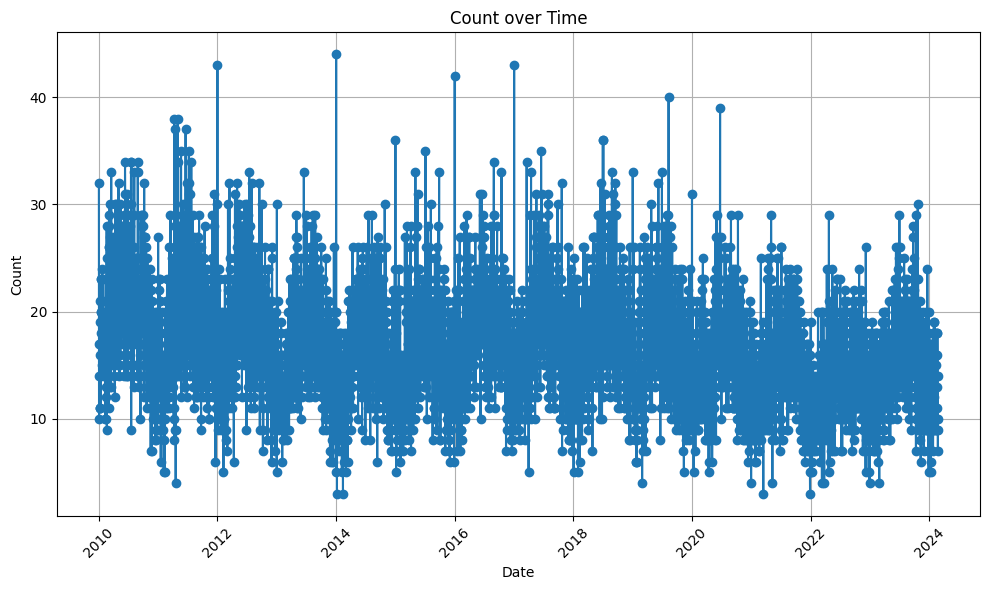

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is already loaded and named merged_df

# Convert 'Date' column to datetime type
# merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# # Sort DataFrame by date
# merged_df.sort_values(by='Date', inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Date'], merged_df['Count'], marker='o', linestyle='-')
plt.title('Count over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


By Month

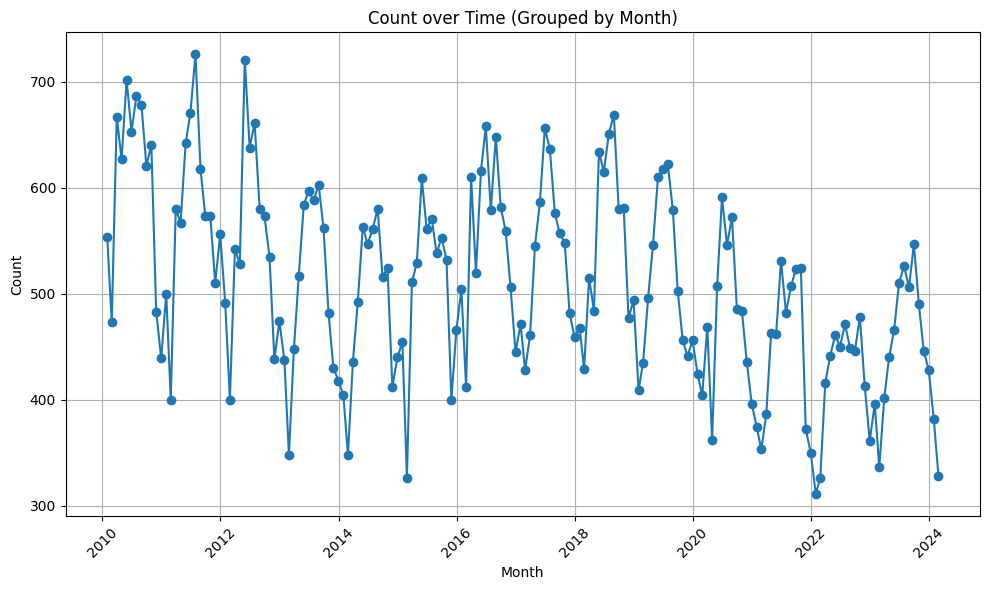

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is already loaded and named merged_df

# Convert 'Date' column to datetime type
# merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Set 'Date' column as the index
merged_df.set_index('Date', inplace=True)

# Resample data by month and aggregate 'Count' values
monthly_counts = merged_df['Count'].resample('M').sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linestyle='-')
plt.title('Count over Time (Grouped by Month)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


by 3months

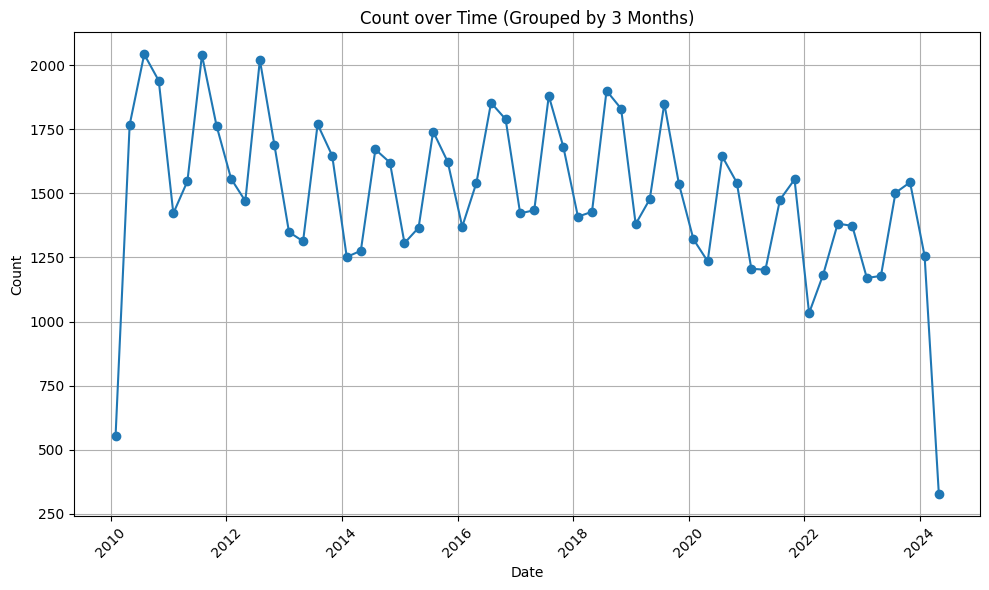

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is already loaded and named merged_df

# Convert 'Date' column to datetime type
# merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Set 'Date' column as the index
# merged_df.set_index('Date', inplace=True)

# Resample data by 3 months and aggregate 'Count' values
quarterly_counts = merged_df['Count'].resample('3M').sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(quarterly_counts.index, quarterly_counts.values, marker='o', linestyle='-')
plt.title('Count over Time (Grouped by 3 Months)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


by 3 months starting in March